In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
from PIL import Image

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge06/data.csv')
df              

,Category,Population
0,Cities Over 10000,78139
1,Cities 5000-10000,8025
2,Cities 2500-5000,37699
3,Country and Villages,734952


In [3]:
# Generate theta and r for the spiral 
theta = np.arange(7, 11.25 * np.pi, 0.01)
r = 0.5 + 0.5 * theta

# Convert to Cartesian coordinates 
x = r * np.cos(theta)
y = r * np.sin(-theta)

# Create dataFrame for the spiral
df_spiral = pd.DataFrame({'x': x, 'y': y})

# Calculate centrex and centrey
centrex = df_spiral['x'].mean()
centrey = df_spiral['y'].mean()

In [4]:
# Font dict
f1 = {'fontsize': 8, 'alpha': 0.6,  'ha':'center', 'va':'center'}

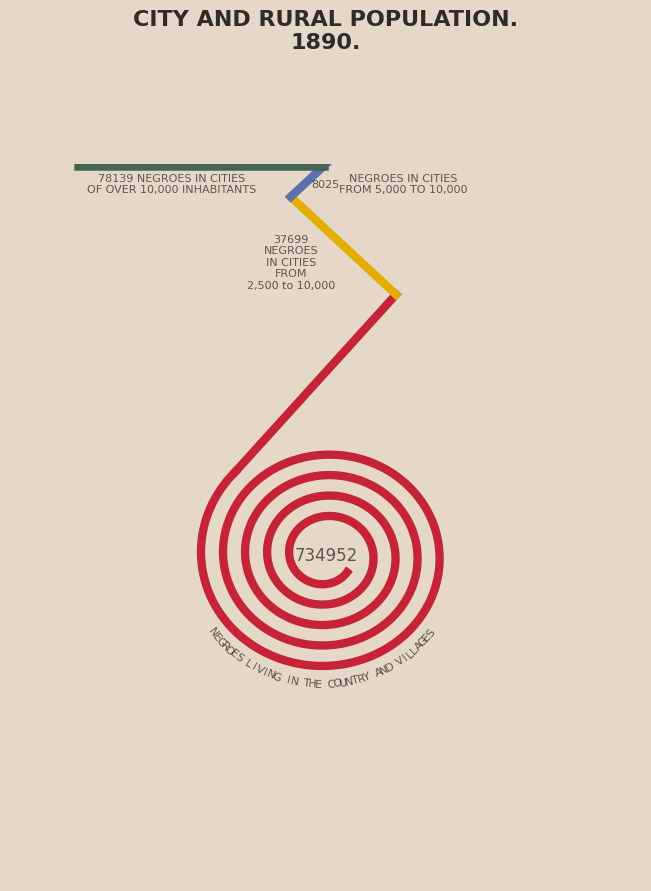

In [5]:
# Create the figure 
fig, ax = plt.subplots(figsize=(8.15, 10.24), facecolor='#e5d8c8')

# Plot spiral points
ax.plot(df_spiral['x'], df_spiral['y'], color='#c62238', lw=6)

# Add line segments
ax.plot([df_spiral['x'].iloc[-1], 10], [df_spiral['y'].iloc[-1], 40], color='#c62238', linewidth=6)
ax.plot([10, -5], [40, 55], color='#e3ae00', linewidth=6)
ax.plot([-5, 0], [55, 60], color='#5b71ae', linewidth=6)
ax.plot([-0.6, -35], [60, 60], color='#466452', linewidth=9)

# Add title
ax.set_title('CITY AND RURAL POPULATION.\n1890.\n\n', fontsize=16, fontweight='bold', alpha=0.8, ha='center', pad=50)

# Annotations
ax.text(0, 0, df.loc[3,'Population'], color='black', fontdict=f1, fontsize=12)
ax.text(-22, 57, str(df.loc[0,'Population'])+' NEGROES IN CITIES\nOF OVER 10,000 INHABITANTS', color='black', fontdict=f1)
ax.text(0, 57, str(df.loc[1,'Population']), color='black', fontdict=f1)
ax.text(11, 57, 'NEGROES IN CITIES\nFROM 5,000 TO 10,000', color='black', fontdict=f1)
ax.text(-5, 45, str(df.loc[2,'Population'])+'\nNEGROES\nIN CITIES\nFROM\n2,500 to 10,000', color='black', fontdict=f1)

# Add curved text
txt = 'NEGROES LIVING IN THE COUNTRY AND VILLAGES'
thetatxt = np.linspace(-.8*np.pi,-0.2*np.pi,len(txt))

# Approximate R using the max x value of the spiral
R = df_spiral['x'].max()  

xs = (R+3)*np.cos(thetatxt) + centrex
ys = (R+3)*np.sin(thetatxt) + centrey

for i,char in enumerate(txt):
    ax.text(xs[i],ys[i],char, fontdict=f1, rotation=90+(thetatxt[i]*180)/np.pi)

# Set background color
ax.set_facecolor('#e5d8c8')

# Turn the axis off
ax.axis('off')  

# Adjust axes position
plt.subplots_adjust(top=0.8, bottom=0.1)  

# Set axis limits
ax.set_xlim(-45, 45)
ax.set_ylim(-50, 60)

# Save the figure
plt.savefig('plate11.jpg')

# Show plot
#plt.show()

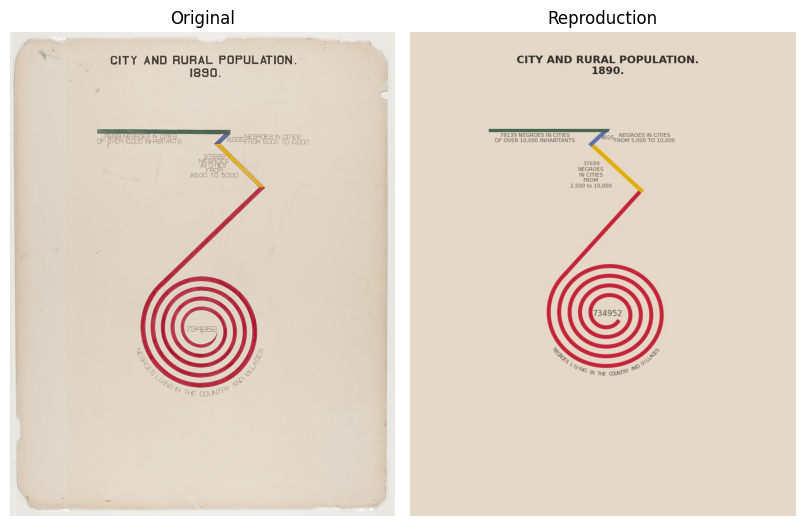

In [6]:
# Load the images
image1 = Image.open('/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge06/original-plate-11.jpg')
image2 = Image.open('plate11.jpg')

# Convert the images to a numpy array 
image_np1 = np.array(image1)
image_np2 = np.array(image2)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.15, 10.24))

# Left subplot
ax1.imshow(image_np1)
# Turn off axis for the image
ax1.axis('off')  
# Set title
ax1.set_title('Original')

# Right subplot
ax2.imshow(image_np2)
# Turn off axis for the image
ax2.axis('off')  
# Set title
ax2.set_title('Reproduction')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()